In [2]:
import sys
import os

# Directories
work_dir = "/Users/emre/GitHub/HU-AI/AIN432/Assignment 3"
# Add the path to your project root directory
if work_dir not in sys.path:
    sys.path.append(work_dir)

In [ ]:
import numpy as np
from skimage import io, color, segmentation
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from utils.create_dataset import extract_superpixels

In [3]:
DATA_PATH = os.path.join(work_dir, "data")
PROCESSED_PATH = os.path.join(DATA_PATH, "processed")
INTERIM_PATH = os.path.join(DATA_PATH, "interim")
RAW_PATH = os.path.join(DATA_PATH, "raw")
MODELS_PATH = os.path.join(work_dir, "models")
GRAPH_PATH = os.path.join(work_dir, "graphs")
OUTPUTS_PATH = os.path.join(work_dir, "outputs")

Number of Superpixels: 90
0 4 []
1 4 [1 1 1 ... 1 1 1]
2 4 [2 2 2 ... 2 2 2]
3 4 [3 3 3 ... 3 3 3]
4 4 [4 4 4 ... 4 4 4]
5 4 [5 5 5 ... 5 5 5]
6 4 [6 6 6 ... 6 6 6]
7 4 [7 7 7 ... 7 7 7]
8 4 [8 8 8 ... 8 8 8]
9 4 [9 9 9 ... 9 9 9]
10 4 [10 10 10 ... 10 10 10]
11 4 [11 11 11 ... 11 11 11]
12 4 [12 12 12 ... 12 12 12]
13 4 [13 13 13 ... 13 13 13]
14 4 [14 14 14 ... 14 14 14]
15 4 [15 15 15 ... 15 15 15]
16 4 [16 16 16 ... 16 16 16]
17 4 [17 17 17 ... 17 17 17]
18 4 [18 18 18 ... 18 18 18]
19 4 [19 19 19 ... 19 19 19]
20 4 [20 20 20 ... 20 20 20]
21 4 [21 21 21 ... 21 21 21]
22 4 [22 22 22 ... 22 22 22]
23 4 [23 23 23 ... 23 23 23]
24 4 [24 24 24 ... 24 24 24]
25 4 [25 25 25 ... 25 25 25]
26 4 [26 26 26 ... 26 26 26]
27 4 [27 27 27 ... 27 27 27]
28 4 [28 28 28 ... 28 28 28]
29 4 [29 29 29 ... 29 29 29]
30 4 [30 30 30 ... 30 30 30]
31 4 [31 31 31 ... 31 31 31]
32 4 [32 32 32 ... 32 32 32]
33 4 [33 33 33 ... 33 33 33]
34 4 [34 34 34 ... 34 34 34]
35 0 [35 35 35 ... 35 35 35]
36 4 [36 36 36 

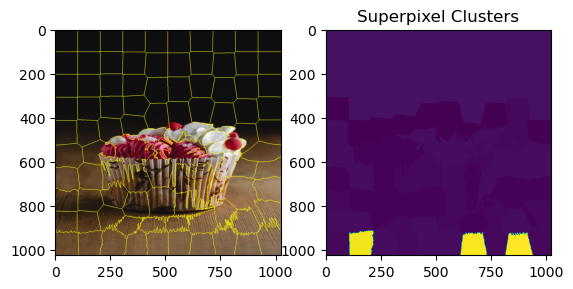

In [7]:
def kmeans(features, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    centroids = features[
        np.random.default_rng().choice(len(features), k, replace=False)
    ]

    for _ in range(max_iters):
        # Assign each feature to the nearest centroid
        distances = np.linalg.norm(features - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        # Update centroids based on the mean of the assigned features
        new_centroids = np.array([features[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids


def visualize_clusters(image, labels):
    cmap = ListedColormap(np.random.rand(len(np.unique(labels)), 3))
    labeled_image = color.label2rgb(labels.reshape(image.shape[:2]), image, kind="avg")

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(labeled_image)
    plt.title("K-Means Clusters")

    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap=cmap, alpha=0.2)
    plt.title("Cluster Labels")

    plt.show()


def visualize_superpixel_clusters(image, segments, labels):
    superpixels = segments.copy()

    # change superpixel values according to labels
    for idx, label in enumerate(labels):
        superpixels[superpixels == idx] = label

    plt.subplot(1, 2, 1)
    plt.imshow(segmentation.mark_boundaries(image, segments))

    plt.subplot(1, 2, 2)
    plt.imshow(superpixels)

    plt.title("Superpixel Clusters")
    plt.show()


# Example usage:
# Assuming 'df' is your Pandas DataFrame with the features, and 'image' is your original image.
df = pd.read_parquet(
    "/Users/emre/GitHub/HU-AI/AIN432/Assignment 3/data/processed/superpixel_abhishek-hajare.parquet"
)
image = io.imread(
    "/Users/emre/GitHub/HU-AI/AIN432/Assignment 3/data/interim/abhishek-hajare(1024, 1024)_resized.jpg"
)

image_xyz = color.rgb2xyz(image)

k = 5  # Adjust the number of clusters as needed

features = df.to_numpy()
superpixels = extract_superpixels(image_xyz)
labels, centroids = kmeans(features, k)
visualize_superpixel_clusters(image, superpixels, labels)